# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In this project, we will build a portfolio of Tesla, Meta, Google, Microsoft, Toyota Motors, and General motors stocks. The aim of this study is to build a high risk and a low risk portfolio given a few constraints.

In [2]:
#load data for Ford (F) and General Motors (GM) stock
tickers = ['TSLA', 'META', 'GOOG', 'MSFT', 'TM', 'GM']

start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [3]:
stock.tail()

Price           Close                                                  \
Ticker             GM        GOOG        META        MSFT          TM   
Date                                                                    
2025-05-12  49.610001  159.580002  639.429993  448.436737  192.320007   
2025-05-13  50.459999  160.889999  656.030029  448.316986  193.970001   
2025-05-14  50.310001  166.809998  659.359985  452.109985  187.000000   
2025-05-15  50.119999  165.399994  643.880005  453.130005  183.449997   
2025-05-16  50.369999  167.429993  640.340027  454.269989  183.190002   

Price                        High                                      ...  \
Ticker            TSLA         GM        GOOG        META        MSFT  ...   
Date                                                                   ...   
2025-05-12  318.380005  50.139999  160.440002  640.390015  448.546521  ...   
2025-05-13  334.070007  50.619999  162.059998  660.919983  449.844181  ...   
2025-05-14  347.679993  50.810001  168.339996  662.669983  453.068218  ...   
2025-05-15  342.820007  50.240002  167.509995  657.309998  456.190002  ...   
2025-05-16  349.980011  50.389999  170.649994  640.440002  454.359985  ...   

Price             Open                                        Volume  \
Ticker            META        MSFT          TM        TSLA        GM   
Date                                                                   
2025-05-12  630.919983  445.122814  190.970001  321.989990  13160600   
2025-05-13  645.539978  446.959462  192.750000  320.000000  10427600   
2025-05-14  661.210022  447.318794  188.169998  342.500000   8949300   
2025-05-15  654.280029  450.769989  182.300003  340.339996   7286600   
2025-05-16  637.960022  452.049988  182.580002  346.239990   6098300   

Price                                                        
Ticker          GOOG      META      MSFT      TM       TSLA  
Date                                                         
2025-05-12  31884900  21965100  22821900  387500  112826700  
2025-05-13  24944300  18570800  23618800  370500  136992600  
2025-05-14  31769200  12348200  19902800  487800  136997300  
2025-05-15  22717600  14341800  21992300  451300   97882600  
2025-05-16  35876900  18405900  23803400  354600   93811800  

[5 rows x 30 columns]

In [4]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

In [5]:
daily_returns

Ticker,GM,GOOG,META,MSFT,TM,TSLA
Date,,,,,,
2024-05-21,-0.004221,0.006033,-0.009020,0.008661,-0.005183,0.064467
2024-05-22,-0.021376,-0.008614,0.006757,0.003444,-0.012523,-0.035400
2024-05-23,-0.005473,-0.016655,-0.004285,-0.008210,-0.008856,-0.036008
2024-05-24,0.008652,0.007229,0.026357,0.007373,0.009825,0.031166
2024-05-28,-0.023396,0.009539,0.003549,0.000372,0.008633,-0.013989
...,...,...,...,...,...,...
2025-05-12,0.043463,0.033128,0.076243,0.023718,0.025222,0.065280
2025-05-13,0.016988,0.008176,0.025629,-0.000267,0.008543,0.048105
2025-05-14,-0.002977,0.036135,0.005063,0.008425,-0.036595,0.039932


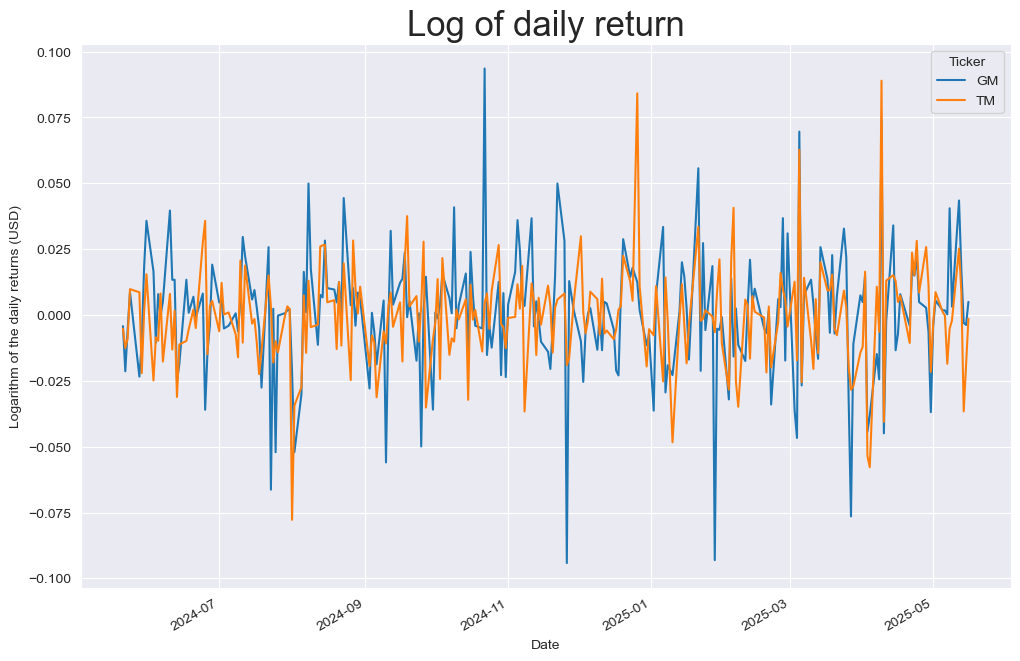

In [6]:
daily_returns.plot(y=['GM', 'TM'], figsize=(12,8), grid=True)
plt.title(f'Log of daily return', size = 25)
plt.ylabel('Logarithm of the daily returns (USD)')
plt.show()

In [7]:
annualized_expectation = {ticker: np.mean(daily_returns[ticker]) for ticker in tickers}
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}

In [8]:
annualized_volatility

{'TSLA': 0.7159675101986459,
 'META': 0.36886634148404956,
 'GOOG': 0.3118210137670186,
 'MSFT': 0.25605853180489685,
 'TM': 0.3021097825174439,
 'GM': 0.375736375112436}

In [9]:
annualized_expectation

{'TSLA': 0.0027958703226403495,
 'META': 0.0012716902499376214,
 'GOOG': -0.00023820148917649215,
 'MSFT': 0.0002961315443732592,
 'TM': -0.000689695836347168,
 'GM': 0.0004847475505002675}

In [10]:
covariance_matrix = 252*((daily_returns).cov())

In [11]:
covariance_matrix

Ticker,GM,GOOG,META,MSFT,TM,TSLA
Ticker,,,,,,
GM,0.141749,0.033777,0.043332,0.024645,0.049625,0.078126
GOOG,0.033777,0.097626,0.071462,0.048967,0.035485,0.129398
META,0.043332,0.071462,0.136613,0.063341,0.041790,0.138258
MSFT,0.024645,0.048967,0.063341,0.065831,0.026901,0.095776
TM,0.049625,0.035485,0.041790,0.026901,0.091640,0.071031
TSLA,0.078126,0.129398,0.138258,0.095776,0.071031,0.514685


Our two main tools will be to study the expected value and the volatility (a notion proportional to the standard deviation). The idea will be to maximize the expected value for the high risk profile, and to minimize the volatility for the low risk profile. That is, if we are willing to risk more, we are mostly interested in maximizing the return, while if we aim to have a lower risk portfolio, we want to reduce the volatility, so that our portfolio is closer in value to what we expect.

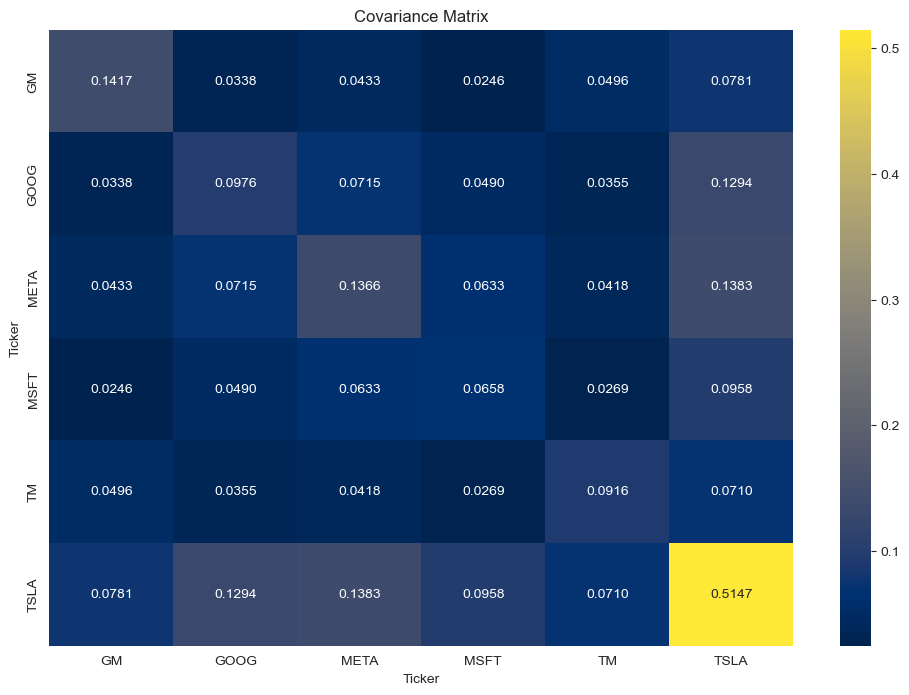

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

In [13]:
n_assets = len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
TSLA: Weight = 0.1789
META: Weight = 0.1643
GOOG: Weight = 0.1000
MSFT: Weight = 0.2318
TM: Weight = 0.2249
GM: Weight = 0.1000


In [14]:
print(f' The optimal volatility subject to the constraints is {result.fun}')

 The optimal volatility subject to the constraints is 0.25536613386634055


In [15]:
n_assets = len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

expctd = list(annualized_expectation.values())

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

def portfolio_mean(weights):
    portfolio_mn = - np.dot(weights.T, expctd)
    return portfolio_mn

result = minimize(portfolio_mean, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to maximize expected return:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to maximize expected return:
TSLA: Weight = 0.3500
META: Weight = 0.2476
GOOG: Weight = 0.1009
MSFT: Weight = 0.1009
TM: Weight = 0.1000
GM: Weight = 0.1006


In [16]:
print(f' The optimal mean subject to the constraints is {-result.fun}')

 The optimal mean subject to the constraints is 0.0012791365120544795
